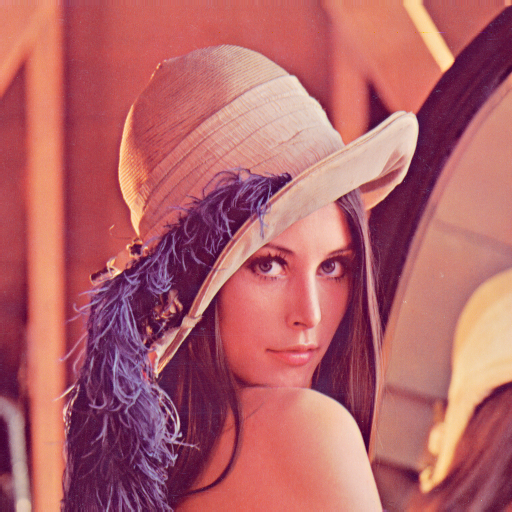

Image Size: 512x512
Total Pixels: 262144


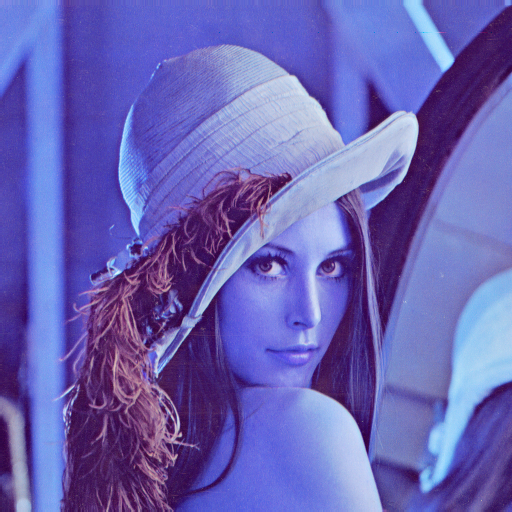

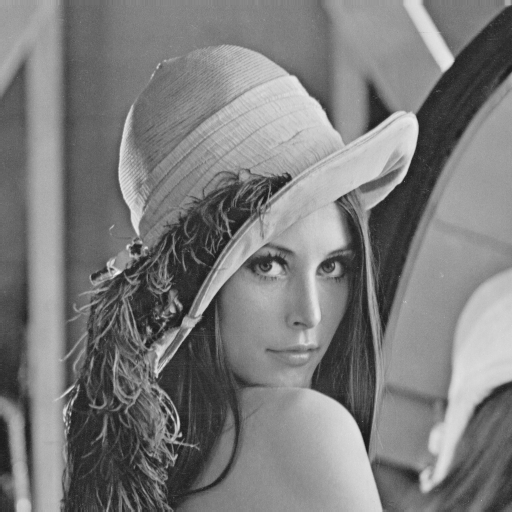

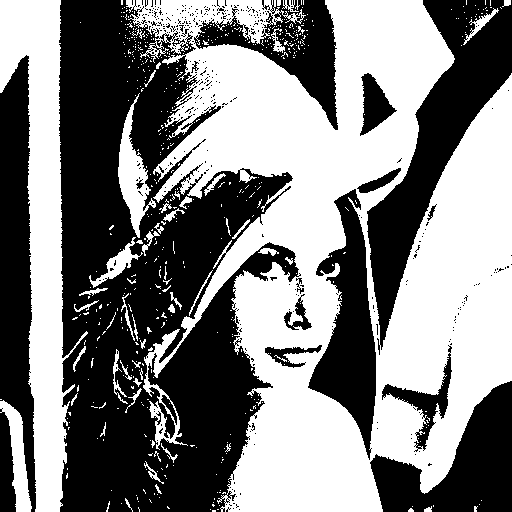

Number of Black Pixels: 130547


In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread('Lena_Image.png')
cv2_imshow(image)
height, width, channels = image.shape
print(f"Image Size: {width}x{height}")
print(f"Total Pixels: {width * height}")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite('lena_rgb.png', image_rgb)
cv2_imshow(image_rgb)


image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite('lena_gray.png', image_gray)
cv2_imshow(image_gray)

threshold_value = 128
_, binary_image = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite('lena_binary.png', binary_image)
cv2_imshow(binary_image)

black_pixels = np.sum(binary_image == 0)
print(f"Number of Black Pixels: {black_pixels}")


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('Lena_Image.png', cv2.IMREAD_GRAYSCALE)

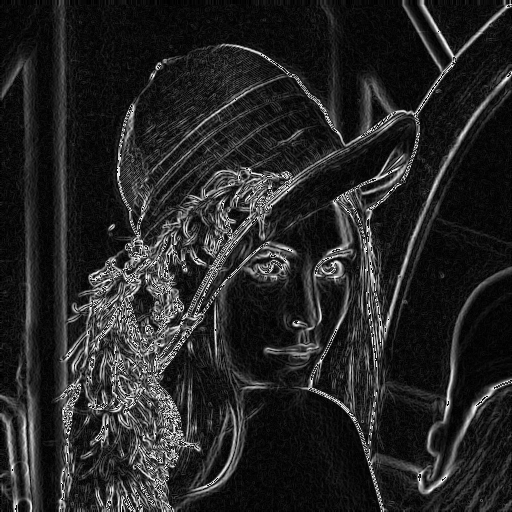

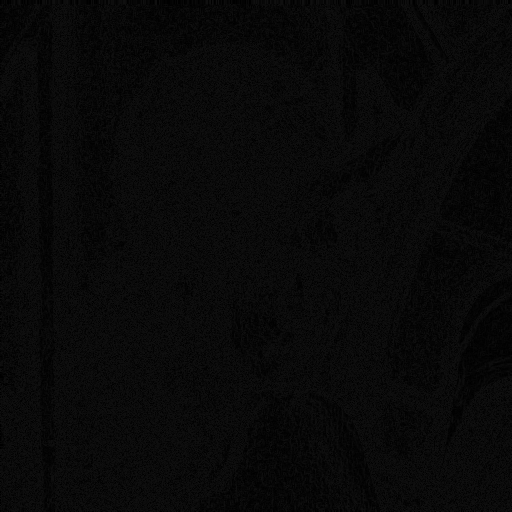

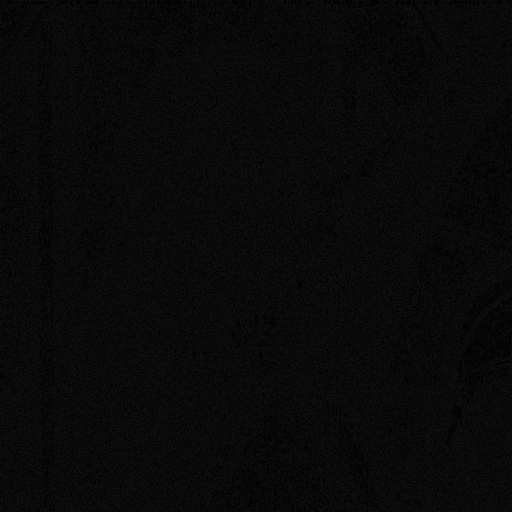

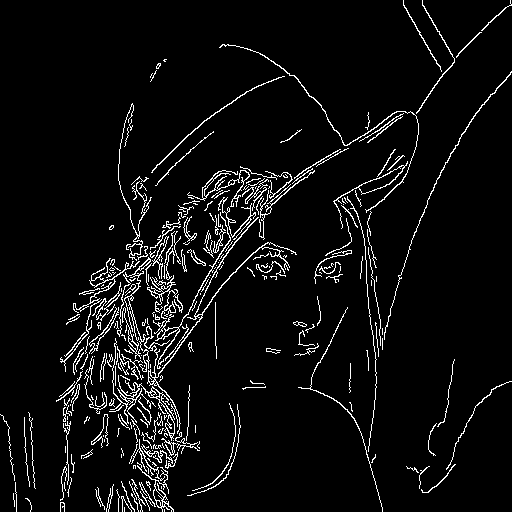

Image Segmentation


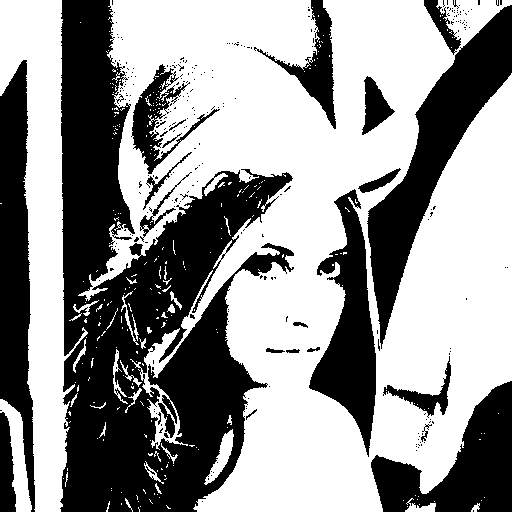

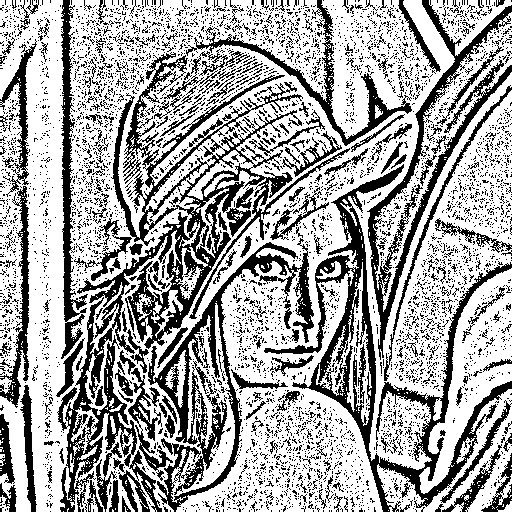

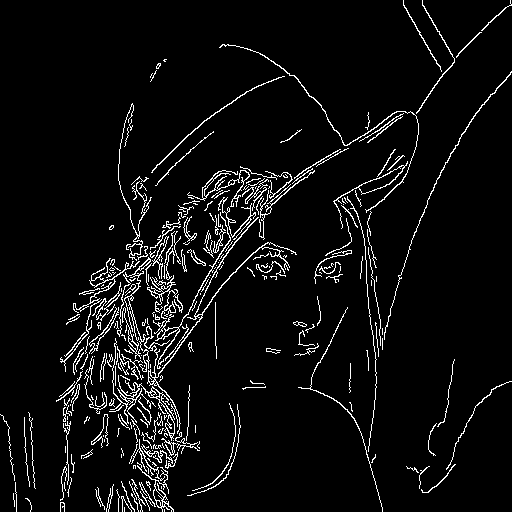

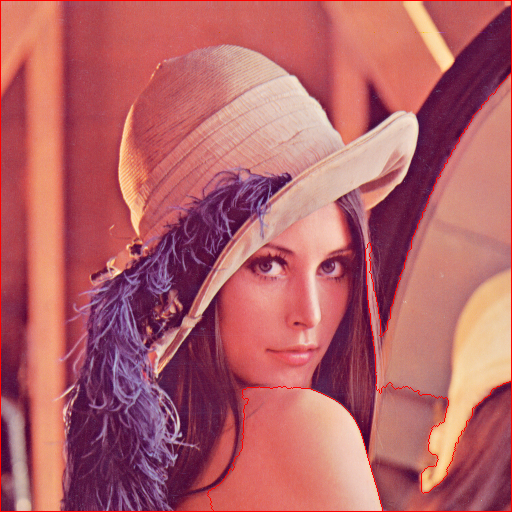

In [8]:
import cv2
import numpy as np
from scipy import ndimage
from google.colab.patches import cv2_imshow

image = cv2.imread('Lena_Image.png', cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

cv2_imshow(np.uint8(sobel_combined))


prewitt_x = ndimage.prewitt(image, axis=0)
prewitt_y = ndimage.prewitt(image, axis=1)
prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)

cv2_imshow(np.uint8(prewitt_combined))

roberts_x = ndimage.sobel(image, axis=0, mode='constant')
roberts_y = ndimage.sobel(image, axis=1, mode='constant')
roberts_combined = np.sqrt(roberts_x**2 + roberts_y**2)

cv2_imshow(np.uint8(roberts_combined))


canny_edges = cv2.Canny(image, 100, 200)
cv2_imshow(canny_edges)


print("Image Segmentation")


_, global_thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
cv2_imshow(global_thresh)


adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 2)
cv2_imshow(adaptive_thresh)


cv2_imshow(canny_edges)  # Already computed above

#(Watershed Algorithm)
image_color = cv2.imread('Lena_Image.png')
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Noise Removal
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)


sure_bg = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=3)


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


_, markers = cv2.connectedComponents(sure_fg)


markers = markers + 1
markers[unknown == 255] = 0


cv2.watershed(image_color, markers)
image_color[markers == -1] = [0, 0, 255]

cv2_imshow(image_color)


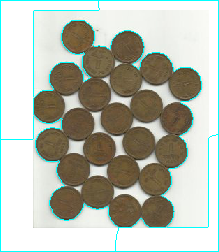

In [10]:
# 2.4 Region-Based Segmentation (Watershed Algorithm)
image_color = cv2.imread('sample.png')  # Load in color for watershed
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Noise Removal
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)


sure_bg = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=3)


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


_, markers = cv2.connectedComponents(sure_fg)


markers = markers + 1
markers[unknown == 255] = 0


cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 255, 0]

cv2_imshow(image_color)

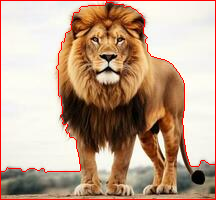

In [11]:
# 2.4 Region-Based Segmentation (Watershed Algorithm)
image_color = cv2.imread('lion.jpg')  # Load in color for watershed
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Noise Removal
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)


sure_bg = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=3)


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


_, markers = cv2.connectedComponents(sure_fg)


markers = markers + 1
markers[unknown == 255] = 0


cv2.watershed(image_color, markers)
image_color[markers == -1] = [0, 0, 255]

cv2_imshow(image_color)